In [10]:
#!pip install semopy
import semopy
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import numpy as np
import plotly.express as px
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import pairwise_distances_argmin_min

In [2]:
data = pd.read_csv('data_final_file.csv')

In [3]:
data

,Universidad,Publicaciones,Ratio,Patentes
0,Asociación Civil Universidad de Ciencias y Hum...,413,0.184032,0
1,Facultad de Teología Pontificia y Civil de Lima,3,0.000000,0
2,Pontificia Universidad Católica del Perú,4202,0.393372,85
3,Universidad Andina del Cusco,37,0.285811,2
4,Universidad Antonio Ruiz de Montoya,24,0.164212,0
...,...,...,...,...
85,Universidad Ricardo Palma,403,0.470942,2
86,Universidad San Ignacio de Loyola S.R.L.,518,0.259578,2
87,Universidad Señor de Sipán S.A.C.,74,0.377377,1
88,Universidad Tecnológica de los Andes,37,0.350043,0


In [4]:
# Normalizar datos: x --> x-x_min/x_max-x_min

columns_to_normalize = data.iloc[:, 1:4]
scaler = MinMaxScaler()
data_normalized = scaler.fit_transform(columns_to_normalize)
data.iloc[:, 1:4] = data_normalized

In [7]:
model = '''
    # Definición de las variables observadas y su relación con el factor latente "innovación"
    innovacion =~ 1 * Publicaciones + b * Patentes + c * Ratio
'''

# Crea un objeto Model y ajusta el modelo a tus datos
cfa_model = semopy.Model(model)
cfa_model.fit(data)

# Visualiza los resultados del CFA
print(cfa_model.inspect())

            lval  op           rval  Estimate  Std. Err   z-value   p-value
0  Publicaciones   ~     innovacion  1.000000         -         -         -
1       Patentes   ~     innovacion  1.758555  1.875177  0.937807  0.348343
2          Ratio   ~     innovacion  0.486474  0.302533  1.608004  0.107834
3     innovacion  ~~     innovacion  0.006062  0.006814  0.889584  0.373689
4       Patentes  ~~       Patentes  0.000000  0.019682       0.0       1.0
5  Publicaciones  ~~  Publicaciones  0.018985  0.006965  2.725687  0.006417
6          Ratio  ~~          Ratio  0.045442   0.00694  6.548296       0.0


In [11]:
selected_columns = data.iloc[:, 1:4]

# Calculate and display mean, variance, and statistics for the selected columns
for column in selected_columns.columns:
    col_data = selected_columns[column]
    mean = np.mean(col_data)
    variance = np.var(col_data)
    std_dev = np.std(col_data)
    max_value = np.max(col_data)
    min_value = np.min(col_data)
    median = np.median(col_data)

    print(f"Variable: {column}")
    print(f"Mean: {mean}")
    print(f"Variance: {variance}")
    print(f"Standard Deviation: {std_dev}")
    print(f"Max Value: {max_value}")
    print(f"Min Value: {min_value}")
    print(f"Median: {median}\n")


Variable: Publicaciones
Mean: 0.05828594285316776
Variance: 0.02504004888297569
Standard Deviation: 0.15824047801676944
Max Value: 1.0
Min Value: 0.0
Median: 0.01119110971983096

Variable: Ratio
Mean: 0.42885143781701723
Variance: 0.046883356514464215
Standard Deviation: 0.21652564862958895
Max Value: 1.0
Min Value: 0.0
Median: 0.43902175128459925

Variable: Patentes
Mean: 0.04502923976608187
Variance: 0.018751759655334363
Standard Deviation: 0.13693706457834695
Max Value: 1.0
Min Value: 0.0
Median: 0.0



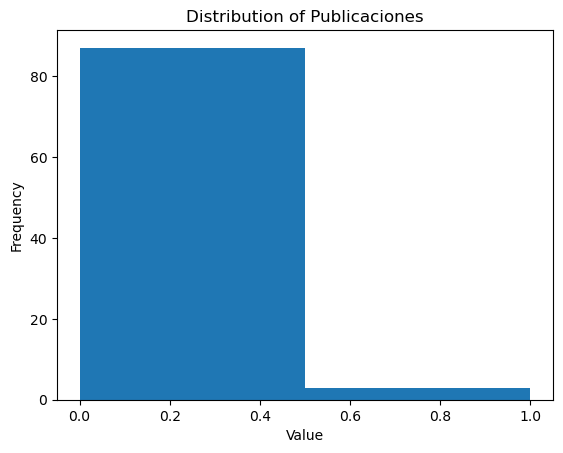

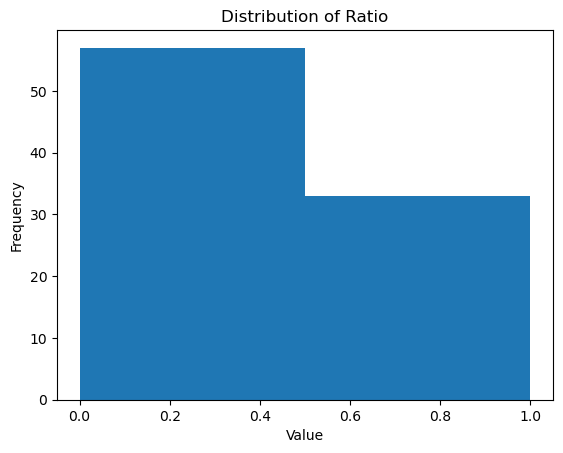

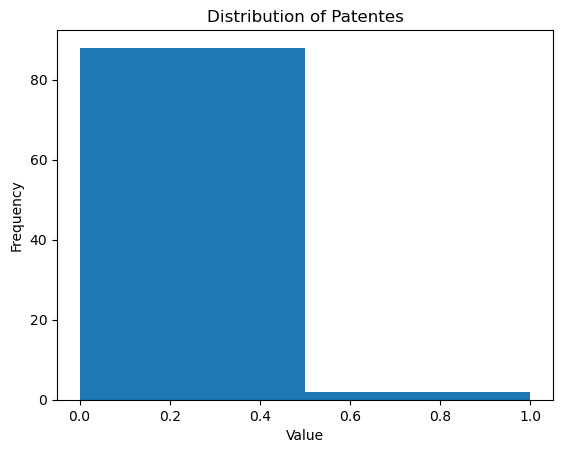

In [14]:
selected_columns = data.iloc[:, 1:4]

# Plot histograms for each selected column in separate subplots
for i, column in enumerate(selected_columns.columns):
    plt.figure(i)
    plt.hist(selected_columns[column], bins=2)
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.title(f'Distribution of {column}')

plt.show()
